In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from common import get_all_data




player_data, rank_match_data, rank_player_match_data, swift_match_data, swift_player_match_data = get_all_data()

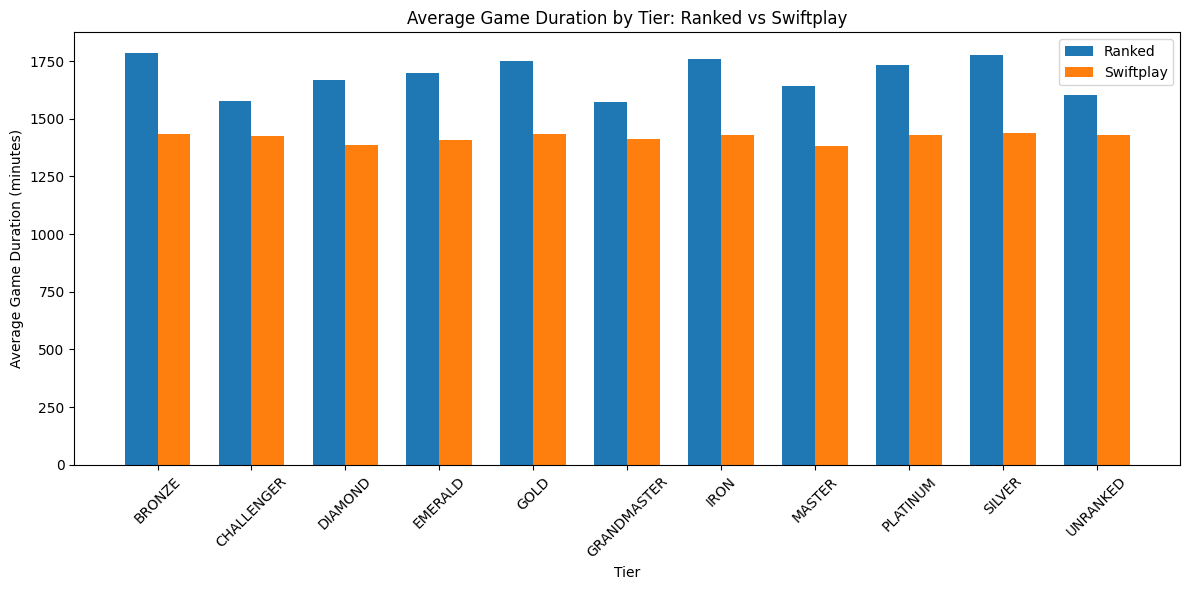

In [3]:
# Swiftplay duration vs Ranked duration

# Merge Ranked datasets
ranked_merged = pd.merge(rank_player_match_data, rank_match_data, on="matchId")
ranked_duration = ranked_merged.groupby("tier")["gameDuration"].mean().reset_index()
ranked_duration = ranked_duration.sort_values("tier")

# Merge Swiftplay datasets
swift_merged = pd.merge(swift_player_match_data, swift_match_data, on="matchId")
swift_duration = swift_merged.groupby("tier")["gameDuration"].mean().reset_index()
swift_duration = swift_duration.sort_values("tier")

# Merge both on tier
combined = pd.merge(ranked_duration, swift_duration, on="tier", suffixes=("_Ranked", "_Swift"))

# Plotting side-by-side bar chart
x = np.arange(len(combined["tier"]))  # label locations
width = 0.35  # width of the bars

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, combined["gameDuration_Ranked"], width, label="Ranked")
plt.bar(x + width/2, combined["gameDuration_Swift"], width, label="Swiftplay")

plt.xlabel("Tier")
plt.ylabel("Average Game Duration (minutes)")
plt.title("Average Game Duration by Tier: Ranked vs Swiftplay")
plt.xticks(x, combined["tier"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# In all games, the percentage of gameEnded InEarlySurrender, and gameEndedInSurrender


# Average amount of time spent dead; Average amount of time spent dead by rank(??)